Calculate $$\int^{1}_{-1}e^{\frac{-x^2}{2}}dx$$ using guass-legendre quadrature.

精确值: 1.7112487837842973

阶数 2 近似值: 1.6929634498, 误差: 1.82853e-02
阶数 3 近似值: 1.7120202452, 误差: 7.71461e-04
阶数 4 近似值: 1.7112245046, 误差: 2.42792e-05
阶数 5 近似值: 1.7112493935, 误差: 6.09740e-07
阶数 6 近似值: 1.7112487710, 误差: 1.27429e-08
阶数 7 近似值: 1.7112487840, 误差: 2.28078e-10
阶数 8 近似值: 1.7112487838, 误差: 3.57026e-12
阶数 9 近似值: 1.7112487838, 误差: 5.01821e-14
阶数10 近似值: 1.7112487838, 误差: 4.44089e-16


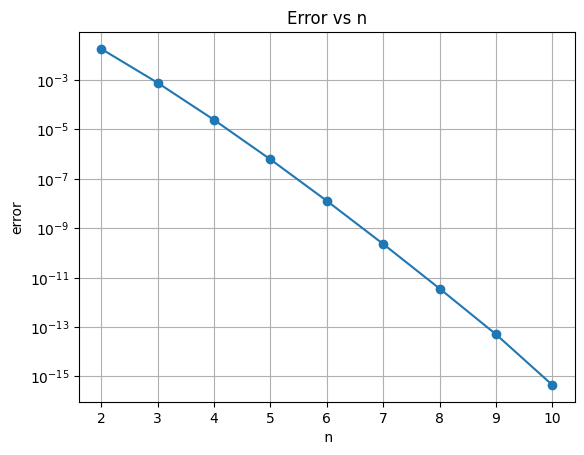

In [6]:
import numpy as np
from scipy.integrate import quad
from numpy.polynomial.legendre import leggauss


def integrand(x):
    return np.exp(-x**2 / 2)
    
exact, _ = quad(integrand, -1, 1)
print(f"精确值: {exact}\n")
    
error=[]
for n in range(2, 11):
    nodes, weights = leggauss(n)
    approx = np.dot(weights, integrand(nodes))
    thiserror = abs(approx - exact)
    error.append(thiserror)
    print(f"阶数{n:2d} 近似值: {approx:.10f}, 误差: {thiserror:.5e}")
    


import matplotlib.pyplot as plt
plt.plot(range(2, 11), error, marker='o')
plt.yscale('log')
plt.xlabel(' n')
plt.ylabel('error')
plt.title('Error vs n')
plt.grid(True)
plt.show()


$$\frac{\mathrm{d} y}{\mathrm{d} x}=x^2-y^2, y(0)=1, find\ y(1)$$

In [ ]:

def f(x, y):
        return x**2 - y**2
    
def euler(f, x0, y0, x_end, n_steps):
    h = (x_end - x0) / n_steps
    x, y = x0, y0
    for _ in range(n_steps):
        y += h * f(x, y)
        x += h
    return y
    
y_euler = euler(f, 0, 1, 1, 10000000)
print(f"正向欧拉法结果 y(1): {y_euler:.6f}")



正向欧拉法结果 y(1): 0.750016


In [13]:
def f(x, y):
    return x**2 - y**2
    
def rk2(f, x0, y0, x_end, n_steps):
    h = (x_end - x0) / n_steps
    x, y = x0, y0
    for _ in range(n_steps):
        k1 = f(x, y)
        k2 = f(x + h/2, y + (h/2)*k1)
        y += h * k2
        x += h
    return y
    
y_rk2 = rk2(f, 0, 1, 1, 100)
print(f"二阶龙格库塔法结果 y(1): {y_rk2:.6f}")


二阶龙格库塔法结果 y(1): 0.750030
